### Import Libraries

In [65]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Load the dataset

In [66]:
iris = load_iris()

In [67]:
type(iris)

sklearn.utils.Bunch

In [68]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


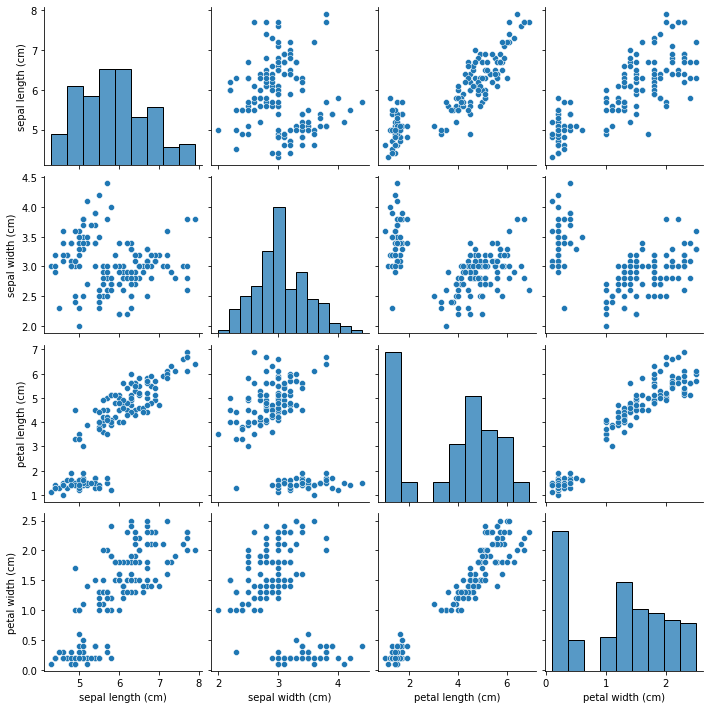

In [69]:
import seaborn as sns
sns.pairplot(df)

## K Means Clustering

In [70]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km

KMeans(n_clusters=2)

In [71]:
y_predicted=km.fit_predict(df)

In [72]:
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


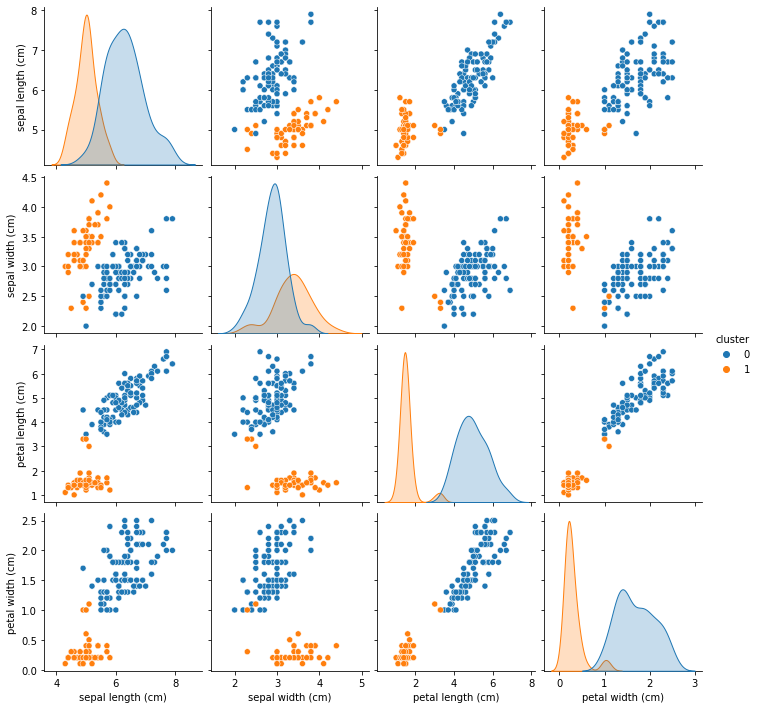

In [73]:
df1=df[df.cluster==0]
df2 = df[df.cluster==0]
sns.pairplot(df,hue='cluster')

### does scaling improve performance?

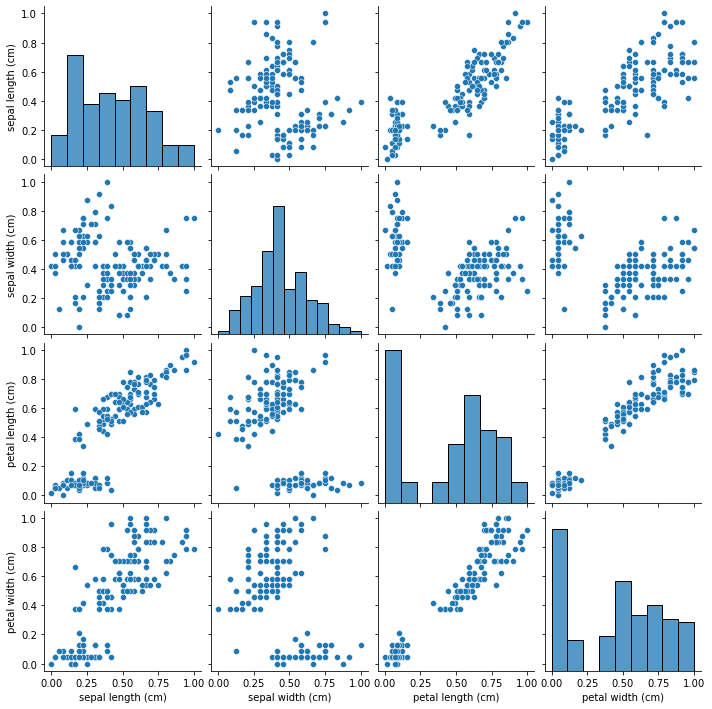

In [74]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
scaler = MinMaxScaler()
scaler.fit(df)
scaler.transform(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns = iris.feature_names)
df_scaled.head()
sns.pairplot(df_scaled)

In [75]:
y_predicted = km.fit_predict(df_scaled)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
df_scaled['cluster'] = y_predicted
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


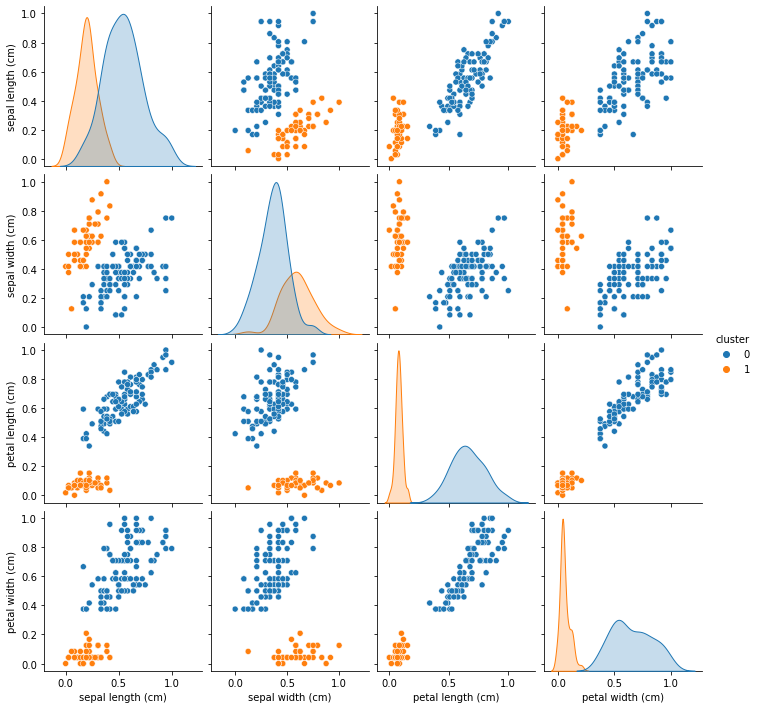

In [77]:
sns.pairplot(df_scaled, hue = 'cluster')

In [40]:
km.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.545     , 0.36333333, 0.6620339 , 0.65666667]])

## Elbow Method

In [41]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
k_value = range(1,10)
sse = []
for k in k_value:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)
sse

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.286505194805194,
 34.573030827867775,
 30.400007434594393,
 28.426548203258754]

In [60]:
# df = pd.DataFrame(iris.data, columns = iris.feature_names)
# scaler = MinMaxScaler()
# scaler.fit(df)
# scaler.transform(df)
# df_scaled = pd.DataFrame(scaler.transform(df), columns = iris.feature_names)
# df_scaled.head()

# k_value = range(1,10)
# sse_scaled = []
# for k in k_value:
#     km = KMeans(n_clusters = k)
#     km.fit(df)
#     sse_scaled.append(km.inertia_)
# sse_scaled

Text(0, 0.5, 'Value of cost function, sse')

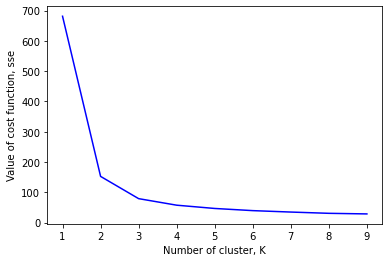

In [64]:
plt.plot(k_value, sse, color = 'b', label = 'not scaled')
plt.xlabel('Number of cluster, K')
plt.ylabel('Value of cost function, sse')

## Final clusters

In [78]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
km3 = KMeans(n_clusters = 3)
y_cluster = km3.fit_predict(df)
y_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [80]:
df['cluster'] = y_cluster
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
